## Multilayer Perceptron Implementation

Vectorization using linear algebra to effectiently compute output of MLP layer without using multiple iterative loops.

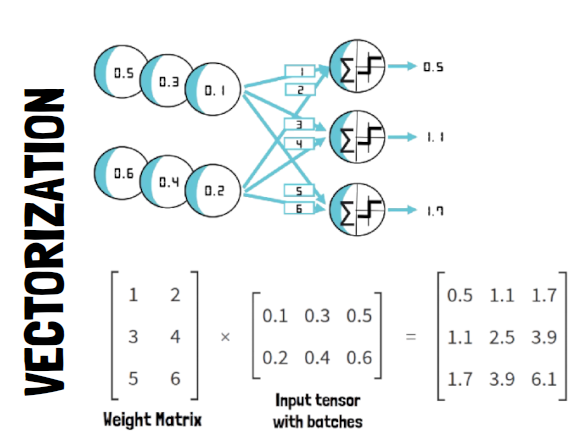


In [2]:
# Use numpy
import numpy as np

WeightMatrix = np.array([[1,2],[3,4],[5,6]]) # 3x2 weight matrix, 2 input feature, 3 perceptron output feature
Input_1 = np.array([[0.15],[0.25]]) # 2x1 input, 2 input feature, 1 batch size
print(f"W = {WeightMatrix}, I = {Input_1}")

# Calculate output value
print(f"W*I = {np.matmul(WeightMatrix, Input_1)}") #3x1, 3 output feature and 1 batch

# If 3 batch size
Input_1 = np.array([[0.15, 0.3, 0.5],[0.25, 0.4, 0.6]]) # 2x3 input, 2 input feature, 3 batch size
print(f"W*I = {np.matmul(WeightMatrix, Input_1)}") # 3x3, 3 ouput feature, 3 batch size

# Reshaping input vector
Input_2 = np.array([[0.15, 0.25],[0.3, 0.4],[0.5, 0.6]]) # 3x2 input, 3 batch size, 2 input feature
print(WeightMatrix.T) # 2x3, 2 input feature, 3 output feature
print(np.matmul(Input_2, WeightMatrix.T)) # 3x3, 3 batch size, 3 output feature

W = [[1 2]
 [3 4]
 [5 6]], I = [[0.15]
 [0.25]]
W*I = [[0.65]
 [1.45]
 [2.25]]
W*I = [[0.65 1.1  1.7 ]
 [1.45 2.5  3.9 ]
 [2.25 3.9  6.1 ]]
[[1 3 5]
 [2 4 6]]
[[0.65 1.45 2.25]
 [1.1  2.5  3.9 ]
 [1.7  3.9  6.1 ]]


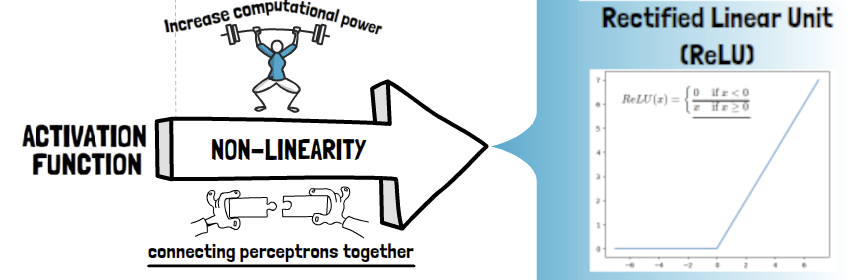


In [8]:
# Lets add bias
bias = np.array([1.1, -2.1, -3.1]) # 3x1 bias
print(f"{np.matmul(Input_2, WeightMatrix.T) + bias}") # 3x3

[[ 1.75 -0.65 -0.85]
 [ 2.2   0.4   0.8 ]
 [ 2.8   1.8   3.  ]]


In [9]:
# Not pass the neuron output through activation, lets use relu to bring non linearity (RELU(x) = x if x>0 and 0 otherwise)
def relu(x):
  return np.maximum(0,x)
x = relu(np.matmul(Input_2, WeightMatrix.T)+bias)
print(x)

[[1.75 0.   0.  ]
 [2.2  0.4  0.8 ]
 [2.8  1.8  3.  ]]


## Pytorch Implementation

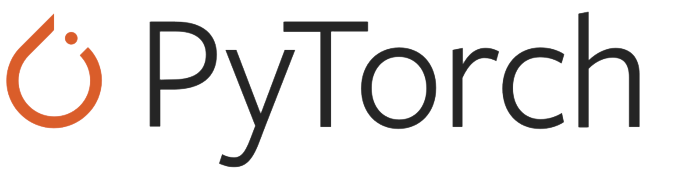

In [11]:
import torch
from torch import nn

layer = nn.Linear(2,3) # Define basic neural net layer with 2 input feature and 3 output feature
print(layer.weight) # Starts with random weights and biases
print(layer.bias)

Parameter containing:
tensor([[ 0.1502,  0.4287],
        [ 0.4152, -0.3307],
        [-0.3924,  0.2988]], requires_grad=True)
Parameter containing:
tensor([ 0.6948,  0.4429, -0.2115], requires_grad=True)


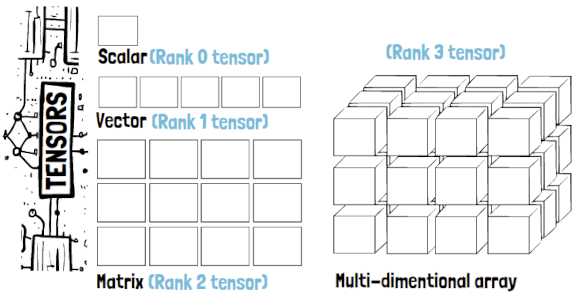

In [12]:
# Calculate neuron value
layer.weight.data = torch.tensor([
    [1., 2.],
    [3., 4.],
    [5., 6.]
]) # Set some weight and bias
layer.bias.data = torch.tensor([1.1, -2.1, -3.1])
Input = torch.tensor([
    [0.15, 0.25],
    [0.3, 0.4],
    [0.5, 0.6]
])
layer(Input) # Input*W.T+b, (3,2),(2,3)+(1,3) => (3,3) , bias vectorizes as value (1,3) is stacked on top of each other row wise.

tensor([[ 1.7500, -0.6500, -0.8500],
        [ 2.2000,  0.4000,  0.8000],
        [ 2.8000,  1.8000,  3.0000]], grad_fn=<AddmmBackward0>)

In [13]:
# Apply non linearity i.e activation to output of neuron
import torch.nn.functional as F

F.relu(layer(Input))

tensor([[1.7500, 0.0000, 0.0000],
        [2.2000, 0.4000, 0.8000],
        [2.8000, 1.8000, 3.0000]], grad_fn=<ReluBackward0>)

## MNSIT digit recognition

In [14]:
# Get the data
!wget https://github.com/kyuz0/mnist-png/raw/main/mnist.tgz
!tar xzf mnist.tgz

--2024-10-15 04:01:08--  https://github.com/kyuz0/mnist-png/raw/main/mnist.tgz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kyuz0/mnist-png/main/mnist.tgz [following]
--2024-10-15 04:01:09--  https://raw.githubusercontent.com/kyuz0/mnist-png/main/mnist.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18294568 (17M) [application/octet-stream]
Saving to: ‘mnist.tgz’

mnist.tgz           100%[===================>]  17.45M  41.2MB/s    in 0.4s    

2024-10-15 04:01:11 (41.2 MB/s) - ‘mnist.tgz’ saved [18294568/18294568]



In [16]:
# Lets see the data what we got
from PIL import Image
import torchvision.transforms as transforms

image_path = 'mnist/training/0/1.png'
image = Image.open(image_path)
image

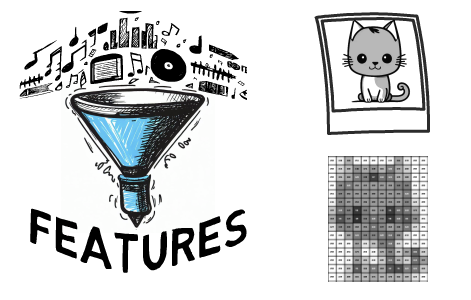

The image is black and white with 28x28 dim with each pixel value range from 0 (lightest) to 255 (darkest).

In [21]:
# Convert image to pytorch tensor and have range from 0 to 1
transform = transforms.Compose([
    transforms.ToTensor()
])
tensor_image = transform(image).squeeze(0)
print(tensor_image.shape)

torch.Size([28, 28])


In [22]:
tensor_image # Entire tensor

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000

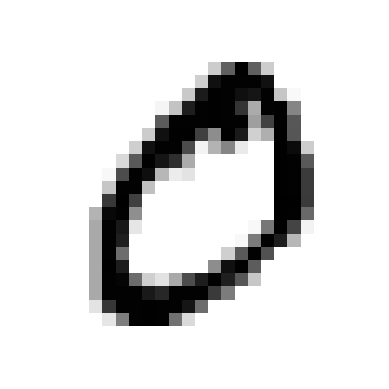

In [23]:
import matplotlib.pyplot as plt

def imshow(tensor_image):
  plt.imshow(tensor_image, cmap="gray")
  plt.axis("off")
  plt.show()

# Display the tensor using matplotlib
imshow(tensor_image)

### Model

*   **Layer 1**: This layer has 28x28 input features, corresponding to the pixels of the MNIST images. It contains 100 units or neurons, and we apply the ReLU activation function to introduce non-linearity.

*   **Layer 2**: This hidden layer has 100 input features from the previous layer and outputs 150 activations for the next layer. We apply the ReLU activation as well for this layer.

*   **Output layer**: Layer 2 connects into this final output layer with 10 units, representing the 10 digits (0-9) we aim to classify. Notice we don't use an activation on the **logits** output by this layer.

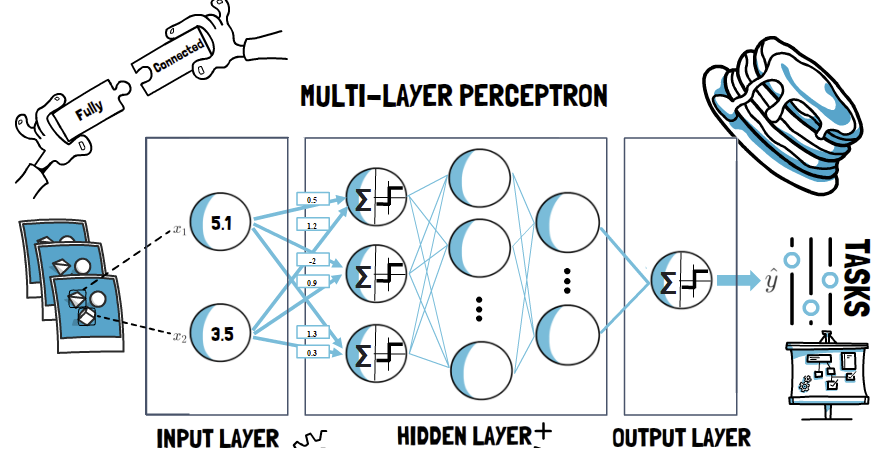

In [27]:
# Lets define NN model architecture
import torch.nn.functional as F

class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Layer1 = nn.Linear(28*28, 100)
        self.Layer2 = nn.Linear(100, 150)
        self.Layer3 = nn.Linear(150,10)

    def forward(self, x):
        x = F.relu(self.Layer1(x))
        x = F.relu(self.Layer2(x))
        x = F.softmax(self.Layer3(x))
        return x

In [28]:
model = MNISTNet()
model

MNISTNet(
  (Layer1): Linear(in_features=784, out_features=100, bias=True)
  (Layer2): Linear(in_features=100, out_features=150, bias=True)
  (Layer3): Linear(in_features=150, out_features=10, bias=True)
)

In [29]:
# Lets dump out our entire models parameters i.e. weights and biases
for name, param in model.named_parameters():
    print(f"Name: {name}")
    print(f"Value: {param.data}")
    print("------")

Name: Layer1.weight
Value: tensor([[-0.0149, -0.0061, -0.0291,  ...,  0.0204,  0.0266, -0.0131],
        [-0.0333,  0.0076,  0.0034,  ..., -0.0344, -0.0024,  0.0268],
        [-0.0152, -0.0035, -0.0309,  ...,  0.0137, -0.0279, -0.0013],
        ...,
        [ 0.0036, -0.0228, -0.0154,  ...,  0.0225,  0.0336,  0.0191],
        [-0.0010,  0.0175, -0.0174,  ..., -0.0043, -0.0074,  0.0072],
        [-0.0206,  0.0121, -0.0304,  ..., -0.0328, -0.0326,  0.0050]])
------
Name: Layer1.bias
Value: tensor([-0.0330, -0.0126, -0.0146,  0.0081,  0.0346, -0.0100,  0.0150, -0.0205,
        -0.0141,  0.0051,  0.0085, -0.0108,  0.0344, -0.0228,  0.0004, -0.0120,
        -0.0168,  0.0095,  0.0178,  0.0228,  0.0187,  0.0180,  0.0109, -0.0137,
         0.0028, -0.0010,  0.0302, -0.0127,  0.0036,  0.0016, -0.0164,  0.0227,
        -0.0172, -0.0244,  0.0208,  0.0016, -0.0310,  0.0056,  0.0039,  0.0347,
        -0.0156,  0.0076,  0.0212,  0.0298,  0.0231, -0.0167,  0.0072,  0.0347,
        -0.0134, -0.0097,  

### Forward Pass
Layer 3 outputs are Logits -> Softmax (Probabilities) -> Cross Entropy (get loss)

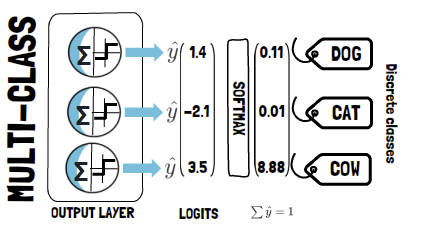

In [30]:
tensor_image.reshape(1, 28*28) # flatten the tensor to get long list of 1d feature

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0

In [33]:
y_hat = model(tensor_image.reshape(1,28*28))
y_hat

<ipython-input-27-d14d726873ab>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.Layer3(x))


tensor([[0.1196, 0.0954, 0.0987, 0.0984, 0.0982, 0.1132, 0.0851, 0.0856, 0.1070,
         0.0987]], grad_fn=<SoftmaxBackward0>)

In [34]:
F.softmax(y_hat, dim=1) # Model is untrained to random probability values

tensor([[0.1020, 0.0995, 0.0999, 0.0998, 0.0998, 0.1013, 0.0985, 0.0986, 0.1007,
         0.0999]], grad_fn=<SoftmaxBackward0>)

## Using GPU

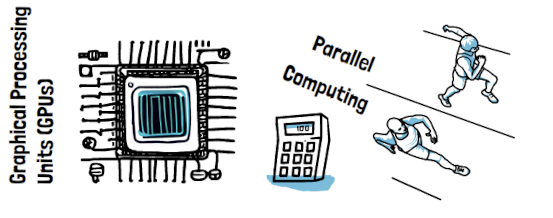

In [35]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cpu')

In [36]:
model.to(DEVICE)
y_hat = model(tensor_image.reshape(1,28*28).to(DEVICE))
y_hat

<ipython-input-27-d14d726873ab>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.Layer3(x))


tensor([[0.1196, 0.0954, 0.0987, 0.0984, 0.0982, 0.1132, 0.0851, 0.0856, 0.1070,
         0.0987]], grad_fn=<SoftmaxBackward0>)